In [1]:
import os
import gc
import sys
import glob
import numpy as np
import pandas as pd
import netCDF4 as nc
from datetime import datetime, timedelta
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
import matplotlib.ticker as mticker
from multiprocessing import Pool
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature, OCEAN
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [2]:
# To use PLUMBER2_GPP_common_utils, change directory to where it exists
os.chdir('/g/data/w97/mm3972/scripts/Land_Drought_Rainfall')
from common_utils import *

## Gamma distribution

In [ ]:
# file_spi_30 = '/g/data/w97/mm3972/scripts/Land_Drought_Rainfall/identify_drought_break_events/calc_AUS_SPI/nc_files/spi_gamma_30_reorder.nc'

file_spi_30         = '/g/data/w97/mm3972/scripts/Land_Drought_Rainfall/identify_drought_break_events/nc_files/spi_gamma_30_reorder.nc'
file_spi_30_nanfill = '/g/data/w97/mm3972/scripts/Land_Drought_Rainfall/identify_drought_break_events/nc_files/spi_gamma_30_reorder_nan_filled.nc' 
file_spi_90         = '/g/data/w97/mm3972/scripts/Land_Drought_Rainfall/identify_drought_break_events/nc_files/spi_gamma_90_reorder.nc'
file_mask           = '/g/data/w97/mm3972/model/cable/src/CABLE-AUX/offline/mmy_gridinfo_AU/gridinfo_AWAP_CSIRO_AU_NAT_ELEV_DLCM_mask.nc'
file_rain           = '/g/data/w97/mm3972/scripts/Land_Drought_Rainfall/identify_drought_break_events/nc_files/agcd_v1_precip_total_r005_daily_1950_2023.nc'


In [ ]:
# Read SPI
file_in    = file_spi_30
var_name   = 'spi_gamma_30'
ts_s       = 29

f_spi      = nc.Dataset(file_in, 'r')
spi        = f_spi.variables[var_name][:,10:,:-45].data #
lat_spi    = f_spi.variables['lat'][10:]
lon_spi    = f_spi.variables['lon'][:-45]

In [ ]:
# Read mask
f_mask     = nc.Dataset(file_mask, 'r')
landsea    = f_mask.variables['landsea'][:]
lat_mask   = f_mask.variables['latitude'][:]
lon_mask   = f_mask.variables['longitude'][:]

ntime      = len(spi[:,0,0])

In [ ]:
for i in np.arange(ts_s, 40):

    spi_tmp  = np.where(landsea == 1, -9999., spi[i,:,:].data)

    #spi_tmp  = spi[i,:,:].data

    if np.sum(np.isnan(spi_tmp)) > 100:
        print(i,' ', np.sum(np.isnan(spi_tmp)))

        # Create a figure with 3 subplots in 1 row
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), subplot_kw={'projection': ccrs.PlateCarree()})

        # Adjust spacing between subplots
        plt.subplots_adjust(wspace=0.3)

        # Set extent based on loc_lat and loc_lon
        ax.set_extent([112, 156, -45, -10])  # Example extent, adjust as needed

        ax.coastlines(resolution="50m", linewidth=1)

        # Add gridlines
        gl               = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='black', linestyle='--')
        gl.xlabels_top   = False
        gl.ylabels_right = False
        gl.xlines        = True

        gl.xlocator      = mticker.FixedLocator([140, 145, 150])
        gl.ylocator      = mticker.FixedLocator([-40, -35, -30])

        gl.xformatter    = LongitudeFormatter()
        gl.yformatter    = LatitudeFormatter()
        gl.xlabel_style  = {'size': 10, 'color': 'black'}
        gl.ylabel_style  = {'size': 10, 'color': 'black'}

        # clevs            = [-5,-4,-3,-2,-1,-0.5,0.5,1,2,3,4,5]
        plot1            = ax.contourf(lon_mask, lat_mask, spi_tmp,  transform=ccrs.PlateCarree(), cmap=plt.cm.ocean) # extend='both', levels=clevs,

        cb = plt.colorbar(plot1, ax=ax, orientation="horizontal", pad=0.02, aspect=16, shrink=0.8)
        cb.ax.tick_params(labelsize=10)

        plt.show()
        # plt.savefig('./plots/spatial_map_obs_'+message+'.png',dpi=300)


Gamma distribution: If there are extended periods of zero precipitation in the dataset, the SPI calculation might fail. The gamma distribution, which is used in the SPI calculation, cannot handle zero precipitation values effectively.

## Pearson distribution

In [ ]:
file_spi_30         = '/g/data/w97/mm3972/scripts/Land_Drought_Rainfall/identify_drought_break_events/nc_files/spi_pearson_30_reorder.nc'
file_spi_30_nanfill = '/g/data/w97/mm3972/scripts/Land_Drought_Rainfall/identify_drought_break_events/nc_files/spi_pearson_30_reorder_nan_filled.nc' 
file_spi_90         = '/g/data/w97/mm3972/scripts/Land_Drought_Rainfall/identify_drought_break_events/nc_files/spi_pearson_90_reorder.nc'
file_mask           = '/g/data/w97/mm3972/model/cable/src/CABLE-AUX/offline/mmy_gridinfo_AU/gridinfo_AWAP_CSIRO_AU_NAT_ELEV_DLCM_mask.nc'
file_rain           = '/g/data/w97/mm3972/scripts/Land_Drought_Rainfall/identify_drought_break_events/nc_files/agcd_v1_precip_total_r005_daily_1950_2023.nc'

In [ ]:
# Read SPI
file_in    = file_spi_30_nanfill
var_name   = 'spi_pearson_30'
ts_s       = 29

f_spi      = nc.Dataset(file_in, 'r')
spi        = f_spi.variables[var_name][:].data #[:,10:,:-45]

In [ ]:
lat_spi    = f_spi.variables['lat'][:] #[10:]
lon_spi    = f_spi.variables['lon'][:] #[:-45]
print(lat_spi)
print(lon_spi)

In [ ]:
# Read mask
f_mask     = nc.Dataset(file_mask, 'r')
landsea    = f_mask.variables['landsea'][:]
lat_mask   = f_mask.variables['latitude'][:]
lon_mask   = f_mask.variables['longitude'][:]

ntime      = len(spi[:,0,0])

In [ ]:
np.unique(spi[30,:,:])

In [ ]:
for i in np.arange(ts_s, 40):

    # spi_tmp  = np.where(landsea == 1, -9999., spi[i,:,:].data)

    spi_tmp  = spi[i,:,:].data

    # if np.sum(np.isnan(spi_tmp)) > 100:
    print(i,' ', np.sum(np.isnan(spi_tmp)))

    # Create a figure with 3 subplots in 1 row
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), subplot_kw={'projection': ccrs.PlateCarree()})

    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0.3)

    # Set extent based on loc_lat and loc_lon
    ax.set_extent([112, 156, -45, -10])  # Example extent, adjust as needed

    ax.coastlines(resolution="50m", linewidth=1)

    # Add gridlines
    gl               = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='black', linestyle='--')
    gl.xlabels_top   = False
    gl.ylabels_right = False
    gl.xlines        = True

    gl.xlocator      = mticker.FixedLocator([140, 145, 150])
    gl.ylocator      = mticker.FixedLocator([-40, -35, -30])

    gl.xformatter    = LongitudeFormatter()
    gl.yformatter    = LatitudeFormatter()
    gl.xlabel_style  = {'size': 10, 'color': 'black'}
    gl.ylabel_style  = {'size': 10, 'color': 'black'}

    # clevs            = [-5,-4,-3,-2,-1,-0.5,0.5,1,2,3,4,5]
    plot1            = ax.contourf(lon_mask, lat_mask, spi_tmp,  transform=ccrs.PlateCarree(), cmap=plt.cm.ocean) # extend='both', levels=clevs,

    cb = plt.colorbar(plot1, ax=ax, orientation="horizontal", pad=0.02, aspect=16, shrink=0.8)
    cb.ax.tick_params(labelsize=10)

    plt.show()
    # plt.savefig('./plots/spatial_map_obs_'+message+'.png',dpi=300)


### 从第一个负值开始积累，直到第一个正值出现，这个时期长于10或者30天，就认为是想要关注的干旱，按到底有多少天spi—90小于-1，将干旱分类，画出相对应的

## Check drought periods

In [ ]:
input_file = '/g/data/w97/mm3972/scripts/Land_Drought_Rainfall/identify_drought_break_events/nc_files/spi_pearson_90_reorder_drought_periods_2000-2023.nc'
mask_file  = '/g/data/w97/mm3972/model/cable/src/CABLE-AUX/offline/mmy_gridinfo_AU/gridinfo_AWAP_OpenLandMap_DLCM_mask.nc'

with nc.Dataset(input_file, mode='r') as f_in:

    lat_out          = f_in.variables['lat'][:]
    lon_out          = f_in.variables['lon'][:]
    accumulated_days = f_in.variables['accumulated_days'][:,:,:]
    time             = nc.num2date(f_in.variables['time'][:],f_in.variables['time'].units,
                         only_use_cftime_datetimes=False,only_use_python_datetimes=True)
    ntime            = len(time)

with nc.Dataset(mask_file, mode='r') as f_mask:

    lat_in           = f_mask.variables['latitude'][:]
    lon_in           = f_mask.variables['longitude'][:]
    landsea          = f_mask.variables['landsea'][:,:]
    
landsea_regrid   = regrid_data(lat_in, lon_in, lat_out, lon_out, landsea, method='nearest')
landsea_3d       = np.repeat(landsea_regrid[np.newaxis, :, :], ntime, axis=0)
accumulated_days = np.where(landsea_3d==0, accumulated_days, np.nan)

In [ ]:
# Get total number of non-NaN pixels
total_pixel = np.sum(~np.isnan(accumulated_days[0, :, :]))

# Loop over time steps
for i in np.arange(ntime):

    # Count drought pixels (where condition is met)
    drought_pixel   = np.sum(accumulated_days[i, :, :] >= 1)
    drought_percent = drought_pixel / total_pixel * 100.0
    
    
    # Only plot when drought_percent exceeds 5%
    if drought_percent > 10:
        print(drought_pixel)
        print(drought_percent)

        # ================== Start Plotting =================
        fig = plt.figure(figsize=(6, 5))
        ax = plt.axes(projection=ccrs.PlateCarree())

        # Set map extent
        ax.set_extent([112, 154, -45, -5])
        ax.coastlines(resolution="50m", linewidth=1)

        # Add gridlines
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='black', linestyle='--')
        gl.top_labels = False
        gl.right_labels = False
        gl.xlines = True
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.xlabel_style = {'size': 10, 'color': 'black'}
        gl.ylabel_style = {'size': 10, 'color': 'black'}

        # Define color map and levels for contour
        cmap = plt.cm.BrBG
        levels = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

        # Create meshgrid of longitude and latitude
        lons, lats = np.meshgrid(lon_out, lat_out)

        # Contour plot
        plot = ax.contourf(lons, lats, accumulated_days[i, :, :], levels=levels, transform=ccrs.PlateCarree(), cmap=cmap)

        # Add colorbar
        cb = plt.colorbar(plot, ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)

        # Save the figure
        fig.savefig(f"./plots/drought_events/drought_events_{time[i]}.png", bbox_inches='tight', dpi=300)

        # Close the figure to avoid memory issues
        plt.close(fig)

## Identify drought area

### Plot weather system of drought-breaking rainfall

In [ ]:
def plot_diagnose_weather_system(time, lat_AGCD, lon_AGCD, accumulated_day, accumulated_day_large_drought, precip_day):
    
    def is_leap(year):
        if year%4 == 0:
            return True
        else:
            return False
    
    # time     = datetime(2017,1,2,0,0,0,0)
    year     = time.year
    month    = time.month
    day      = time.day

    dom_leap = {1:31, 2:29, 3:31, 4:30, 5:31, 6:30, 7:31, 8:31, 9:30, 10:31, 11:30, 12:31}
    dom_com  = {1:31, 2:28, 3:31, 4:30, 5:31, 6:30, 7:31, 8:31, 9:30, 10:31, 11:30, 12:31}

    if is_leap(year):
        dom = dom_leap
    else:
        dom = dom_com

    # ERA5 MSLP
    ERA5_MSLP_path    = "/g/data/rt52/era5/single-levels/reanalysis"
    ERA5_MSLP_T_file  = f'{ERA5_MSLP_path}/2t/{year}/2t_era5_oper_sfc_{year}{month:02d}01-{year}{month:02d}{dom[month]:02d}.nc'   # air temperature
    ERA5_MSLP_P_file  = f'{ERA5_MSLP_path}/sp/{year}/sp_era5_oper_sfc_{year}{month:02d}01-{year}{month:02d}{dom[month]:02d}.nc'   # surface pressure
    ERA5_MSLP_U_file  = f'{ERA5_MSLP_path}/10u/{year}/10u_era5_oper_sfc_{year}{month:02d}01-{year}{month:02d}{dom[month]:02d}.nc' # 10 m wind speed
    ERA5_MSLP_V_file  = f'{ERA5_MSLP_path}/10v/{year}/10v_era5_oper_sfc_{year}{month:02d}01-{year}{month:02d}{dom[month]:02d}.nc' # 10 m wind speed
    ERA5_MSLP_R_file  = f'{ERA5_MSLP_path}/tp/{year}/tp_era5_oper_sfc_{year}{month:02d}01-{year}{month:02d}{dom[month]:02d}.nc'   # Total rainfall

    # ERA5 Pressure level
    ERA5_Press_path    = "/g/data/rt52/era5/pressure-levels/reanalysis"
    ERA5_Press_T_file  = f'{ERA5_Press_path}/t/{year}/t_era5_oper_pl_{year}{month:02d}01-{year}{month:02d}{dom[month]:02d}.nc'   # air temperature
    ERA5_Press_Z_file  = f'{ERA5_Press_path}/z/{year}/z_era5_oper_pl_{year}{month:02d}01-{year}{month:02d}{dom[month]:02d}.nc'   # Geopotential
    ERA5_Press_U_file  = f'{ERA5_Press_path}/u/{year}/u_era5_oper_pl_{year}{month:02d}01-{year}{month:02d}{dom[month]:02d}.nc'   # wind speed
    ERA5_Press_V_file  = f'{ERA5_Press_path}/v/{year}/v_era5_oper_pl_{year}{month:02d}01-{year}{month:02d}{dom[month]:02d}.nc'   # wind speed
    ERA5_Press_PV_file = f'{ERA5_Press_path}/pv/{year}/pv_era5_oper_pl_{year}{month:02d}01-{year}{month:02d}{dom[month]:02d}.nc' # Potential vorticity
    ERA5_Press_w_file  = f'{ERA5_Press_path}/w/{year}/w_era5_oper_pl_{year}{month:02d}01-{year}{month:02d}{dom[month]:02d}.nc'   # Vertical velocity

    # Open the NetCDF file
    # -10: convert UTC to AEDT 
    t_s        = max(0,(day-1)*24-10)
    t_e        = day*24-10

    loc_lat    = [-48,-5]
    loc_lon    = [110,156]

    with nc.Dataset(ERA5_MSLP_T_file) as f_T_mslp:
        lat       = f_T_mslp.variables['latitude'][:]
        lon       = f_T_mslp.variables['longitude'][:]
        lat_idx_s = np.argmin(np.abs(lat - loc_lat[0]))
        lat_idx_e = np.argmin(np.abs(lat - loc_lat[1]))
        lon_idx_s = np.argmin(np.abs(lon - loc_lon[0]))
        lon_idx_e = np.argmin(np.abs(lon - loc_lon[1]))
        T_mslp    = np.nanmean(f_T_mslp.variables['t2m'][t_s:t_e,lat_idx_s:lat_idx_e:-1,lon_idx_s:lon_idx_e], axis=0)
        T_mslp    = T_mslp - 273.15
        lat_AU    = f_T_mslp.variables['latitude'][lat_idx_s:lat_idx_e:-1]
        lon_AU    = f_T_mslp.variables['longitude'][lon_idx_s:lon_idx_e]

    with nc.Dataset(ERA5_MSLP_P_file) as f_P_mslp:
        P_mslp = np.nanmean(f_P_mslp.variables['sp'][t_s:t_e,lat_idx_s:lat_idx_e:-1,lon_idx_s:lon_idx_e], axis=0)

    with nc.Dataset(ERA5_MSLP_U_file) as f_U_mslp:
        U_mslp = np.nanmean(f_U_mslp.variables['u10'][t_s:t_e,lat_idx_s:lat_idx_e:-1,lon_idx_s:lon_idx_e], axis=0)

    with nc.Dataset(ERA5_MSLP_V_file) as f_V_mslp:
        V_mslp = np.nanmean(f_V_mslp.variables['v10'][t_s:t_e,lat_idx_s:lat_idx_e:-1,lon_idx_s:lon_idx_e], axis=0)

    with nc.Dataset(ERA5_MSLP_R_file) as f_R_mslp:
        R_mslp = np.nansum(f_R_mslp.variables['tp'][t_s:t_e,lat_idx_s:lat_idx_e:-1,lon_idx_s:lon_idx_e], axis=0)

    with nc.Dataset(ERA5_Press_T_file) as f_T_press:
        T_press = np.nanmean(f_T_press.variables['t'][t_s:t_e,:,lat_idx_s:lat_idx_e:-1,lon_idx_s:lon_idx_e], axis=0)
        T_press = T_press - 273.15

    with nc.Dataset(ERA5_Press_Z_file) as f_Z_press:
        Z_press = np.nanmean(f_Z_press.variables['z'][t_s:t_e,:,lat_idx_s:lat_idx_e:-1,lon_idx_s:lon_idx_e], axis=0)
        #geopotential to geopotential height
        Z_press = Z_press/9.81

    with nc.Dataset(ERA5_Press_U_file) as f_U_press:
        U_press = np.nanmean(f_U_press.variables['u'][t_s:t_e,:,lat_idx_s:lat_idx_e:-1,lon_idx_s:lon_idx_e], axis=0)

    with nc.Dataset(ERA5_Press_V_file) as f_V_press:
        V_press = np.nanmean(f_V_press.variables['v'][t_s:t_e,:,lat_idx_s:lat_idx_e:-1,lon_idx_s:lon_idx_e], axis=0)

    with nc.Dataset(ERA5_Press_PV_file) as f_PV_press:
        PV_press = np.nanmean(f_PV_press.variables['pv'][t_s:t_e,:,lat_idx_s:lat_idx_e:-1,lon_idx_s:lon_idx_e], axis=0)

    with nc.Dataset(ERA5_Press_w_file) as f_w_press:
        w_press = np.nanmean(f_w_press.variables['w'][t_s:t_e,:,lat_idx_s:lat_idx_e:-1,lon_idx_s:lon_idx_e], axis=0)

    # ================== Start Plotting =================
    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=[8,12],sharex=False,
                sharey=False, squeeze=True, subplot_kw={'projection': ccrs.PlateCarree()})
    
    plt.subplots_adjust(wspace=-0.15, hspace=0.105)

    plt.rcParams['text.usetex']     = False
    plt.rcParams['font.family']     = "sans-serif"
    plt.rcParams['font.serif']      = "Helvetica"
    plt.rcParams['axes.linewidth']  = 1.5
    plt.rcParams['axes.labelsize']  = 12
    plt.rcParams['font.size']       = 12
    plt.rcParams['legend.fontsize'] = 12
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12

    almost_black                    = '#262626'
    # change the tick colors also to the almost black
    plt.rcParams['ytick.color']     = almost_black
    plt.rcParams['xtick.color']     = almost_black

    # change the text colors also to the almost black
    plt.rcParams['text.color']      = almost_black

    # Change the default axis colors from black to a slightly lighter black,
    # and a little thinner (0.5 instead of 1)
    plt.rcParams['axes.edgecolor']  = almost_black
    plt.rcParams['axes.labelcolor'] = almost_black

    # set the box type of sequence number
    props = dict(boxstyle="round", facecolor='white', alpha=0.0, ec='white')

    states= NaturalEarthFeature(category="cultural", scale="50m",
                                        facecolor="none",
                                        name="admin_1_states_provinces_shp")
    texts = ["(a)","(b)","(c)","(d)","(e)","(f)"]

    # Download and add the states and coastlines
    states = NaturalEarthFeature(category="cultural", scale="50m",
                                         facecolor="none",
                                         name="admin_1_states_provinces_shp")
                    #  925 850 500 hPa
    pressure_levels = [33, 30, 21]  # Pressure levels for the plots
    variables = {"geopotential": Z_press, "wind_u": U_press, "wind_v": V_press, "w": w_press, "temperature": T_press}

    for i, ax in enumerate(axs.flat):

        ax.add_feature(states, linewidth=.5, edgecolor="black")
        ax.coastlines('50m', linewidth=0.8)
    
        # Set map extent for specific region
        ax.set_extent([112, 154, -43, -9])
        ax.coastlines(resolution="50m", linewidth=1)

        if i == 0:  
            # Plot the original accumulated day data
            accumulated_day               = np.where(accumulated_day<0, np.nan, accumulated_day)
            accumulated_day_large_drought = np.where(accumulated_day_large_drought<0, np.nan, accumulated_day_large_drought)
            im1                           = ax.imshow(accumulated_day_large_drought[:, :], vmin=0, vmax=200, cmap='hot_r', 
                                                      extent=[lon_AGCD.min(), lon_AGCD.max(), lat_AGCD.min(), lat_AGCD.max()])
            cbar1                         = plt.colorbar(im1, ax=ax, orientation="horizontal", pad=0.02, aspect=20, shrink=0.7)
            cbar1.set_label('days')
            ax.text(0.02, 0.95, texts[i], transform=ax.transAxes, fontsize=12, bbox=props)
        elif i == 1:
            precip_day                    = np.where(precip_day<0.0001, np.nan, precip_day)
            im2                           = ax.imshow(precip_day[:, :], vmin=0, vmax=20, cmap='YlGnBu', 
                                                      extent=[lon_AGCD.min(), lon_AGCD.max(), lat_AGCD.min(), lat_AGCD.max()])
            cbar2                         = plt.colorbar(im2, ax=ax, orientation="horizontal", pad=0.02, aspect=20, shrink=0.7)
            cbar2.set_label('rainfall')
            ax.text(0.02, 0.95, texts[i], transform=ax.transAxes, fontsize=12, bbox=props)
        elif i == 2: # Top-left panel (MSLP)
            # Precipitation as contourf
            R_mslp = np.where(R_mslp*1000<0.01, np.nan,R_mslp)
            pcm  = ax.contourf(lon_AU, lat_AU, R_mslp * 1000, levels=np.arange(0, 30, 2), cmap="YlGnBu", extend="max")
            cbar = fig.colorbar(pcm, ax=ax, orientation="horizontal", pad=0.05, aspect=20, shrink=0.7)
            cbar.set_label("Precipitation (mm/day)")        

            # MSLP as contour lines
            c = ax.contour(lon_AU, lat_AU, P_mslp / 100, levels=np.arange(980, 1050, 10), colors="black", linewidths=0.8) # 
            ax.clabel(c, inline=True, fontsize=8, fmt='%d hPa')

            # 10m Wind as arrows
            ax.quiver(lon_AU[::5], lat_AU[::5], U_mslp[::5, ::5], V_mslp[::5, ::5],  scale=500, width=0.002, color="black")
            ax.text(0.02, 0.95, texts[i], transform=ax.transAxes, fontsize=12, bbox=props)

        else:  # Top-right, Bottom-left, Bottom-right panels (Pressure levels)
            level_idx = pressure_levels[i - 3]  # Select pressure level (925, 850, or 500 hPa)

            # # Temperature as contourf
            # level_temp = [-40,-35,-30,-25,-20,-15,-10,-5,0,5,10,15,20,25,30,35,40,45,50,55]
            # pcm = ax.contourf(lon_AU, lat_AU, variables["temperature"][level_idx], levels=level_temp, cmap="hot_r", extend="both")
            # cbar = fig.colorbar(pcm, ax=ax, orientation="horizontal", pad=0.05, aspect=20, shrink=0.7)
            # cbar.set_label("Temperature (K)")

            # Vertical velocity as red contours
            level_velo = [-1.2,-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1.,1.2]
            pcm = ax.contourf(lon_AU, lat_AU, variables["w"][level_idx], levels=level_velo, cmap="bwr", extend="both")
            cbar = fig.colorbar(pcm, ax=ax, orientation="horizontal", pad=0.05, aspect=20, shrink=0.7)
            cbar.set_label("Vertical Velocity (Pa/s)")

            # Geopotential as contour lines
            c = ax.contour(lon_AU, lat_AU, variables["geopotential"][level_idx]/10., levels=np.arange(0, 600, 5), colors="black", linewidths=0.8)
            ax.clabel(c, inline=True, fontsize=8, fmt='%d dam')

            # Wind as arrows
            ax.quiver(lon_AU[::5], lat_AU[::5], variables["wind_u"][level_idx, ::5, ::5], variables["wind_v"][level_idx, ::5, ::5], scale=300, width=0.002, color="black")

            # # Vertical velocity as red contours
            # c = ax.contour(lon_AU, lat_AU, variables["w"][level_idx], levels=np.arange(-1, 1.1, 0.4), colors="white", linewidths=0.8)
            # ax.clabel(c, inline=True, fontsize=8, fmt='%0.1f Pa/s')
            ax.text(0.02, 0.95, texts[i], transform=ax.transAxes, fontsize=12, bbox=props)

    # Add titles and save the figure    
    axs[0, 0].set_title("Accumulated Days in Drought")
    axs[0, 1].set_title("Rainfall")
    axs[1, 0].set_title("MSLP & Precipitation")
    axs[1, 1].set_title("925 hPa Level")
    axs[2, 0].set_title("850 hPa Level")
    axs[2, 1].set_title("500 hPa Level")
    
    output_path = f"/g/data/w97/mm3972/scripts/Land_Drought_Rainfall/identify_drought_break_events/plots/{year}"
    if not os.path.exists(output_path):  # Check if the path does NOT exist
        os.mkdir(output_path)  # Create the directory
    plt.tight_layout()
    plt.savefig(f"{output_path}/Diagnose_weather_system_{time}" , dpi=300, bbox_inches="tight")
    plt.show()

### Check identify drought covering large area

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label, sum as nd_sum
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

def keep_only_large_drought_region(i, time, accumulated_day, precip_day, lat, lon, min_drought_area_km2=10000):
    
    # Define the drought threshold
    drought_binary = accumulated_day > 0

    # Label connected regions in the binary drought mask
    labeled_droughts, num_features = label(drought_binary)

    # Calculate grid cell size (resolution) based on lat/lon coordinates
    lat_resolution = abs(lat[1] - lat[0])  # Latitude resolution in degrees
    lon_resolution = abs(lon[1] - lon[0])  # Longitude resolution in degrees

    # Approximate cell area in km^2
    earth_radius_km = 6371.0
    cell_area_km2 = (
        (lat_resolution * np.pi / 180) *
        (lon_resolution * np.pi / 180) *
        (earth_radius_km ** 2) )

    # Calculate area in km^2 for each labeled region
    drought_areas     = nd_sum(drought_binary, labeled_droughts, index=range(1, num_features + 1))
    drought_areas_km2 = drought_areas * cell_area_km2

    # Filter regions that meet the minimum area threshold
    large_drought_labels = [i + 1 for i, area in enumerate(drought_areas_km2) if area >= min_drought_area_km2]
    large_drought_map    = np.isin(labeled_droughts, large_drought_labels)
    
    accumulated_day_large_drought = np.where(~np.isnan(large_drought_map), accumulated_day, np.nan)
    
    if large_drought_labels != None:
        
        # ============ Plotting weather system diagnose =============
        plot_diagnose_weather_system(time, lat, lon, accumulated_day, accumulated_day_large_drought, precip_day)
    
    large_drought_labels= None
    large_drought_map   = None
    precip_day          = None
    
    return 


### Read in data

In [ ]:
input_file = '/g/data/w97/mm3972/scripts/Land_Drought_Rainfall/identify_drought_break_events/nc_files/spi_pearson_90_reorder_nan_filled_drought_periods.nc'
mask_file  = '/g/data/w97/mm3972/model/cable/src/CABLE-AUX/offline/mmy_gridinfo_AU/gridinfo_AWAP_OpenLandMap_DLCM_mask.nc'
rain_file  = '/g/data/w97/mm3972/scripts/Land_Drought_Rainfall/identify_drought_break_events/nc_files/agcd_v1_precip_total_r005_daily_1950_2023.nc'

with nc.Dataset(input_file, mode='r') as f_in:
    lat_out          = f_in.variables['lat'][:]
    lon_out          = f_in.variables['lon'][:]
    accumulated_days = f_in.variables['accumulated_days'][:,:,:]
    time             = nc.num2date(f_in.variables['time'][:],f_in.variables['time'].units,
                         only_use_cftime_datetimes=False,only_use_python_datetimes=True)
    ntime            = len(time)
    
with nc.Dataset(rain_file, mode='r') as f_rain:
    lat_rain         = f_rain.variables['lat'][10:]
    lon_rain         = f_rain.variables['lon'][:-45]
    precip           = f_rain.variables['precip'][:,10:,:-45]
    time_rain        = nc.num2date(f_rain.variables['time'][:],f_rain.variables['time'].units,
                         only_use_cftime_datetimes=False,only_use_python_datetimes=True)
    ntime_rain       = len(time)

with nc.Dataset(mask_file, mode='r') as f_mask:
    landsea          = f_mask.variables['landsea'][:,:]
    
landsea_3d           = np.repeat(landsea[np.newaxis, :, :], ntime, axis=0)
accumulated_days     = np.where(landsea_3d==0, accumulated_days, np.nan)
precip               = np.where(landsea_3d==0, precip, np.nan)

# Define minimum drought area in square kilometers (example threshold)
# min_drought_area_km2 = 10000  # Minimum size in square km


### Calculate

In [ ]:
min_drought_area_km2 = 10000  # Minimum size in square km

# Prepare arguments for parallel processing
args_list = [ (i, time[i], accumulated_days[i,::-1,:], precip[i,::-1,:], 
               lat_out, lon_out, min_drought_area_km2=min_drought_area_km2) 
               for i in np.arange(ntime)]

# Use multiprocessing to calculate accumulated days for each grid point
with Pool() as pool:
    pool.map(keep_only_large_drought_region, args_list)


## Check the identified drought-breaking rainfall

In [ ]:
def find_drought_breaking_date(spi_series, threshold=-1, min_period=30):
    
    # Initialize the output array
    result       = np.zeros_like(spi_series, dtype=np.int8)
    conditions_1 = np.zeros_like(spi_series, dtype=np.int8)
    conditions_2 = np.zeros_like(spi_series, dtype=np.int8)
    conditions_3 = np.zeros_like(spi_series, dtype=np.int8)

    # Iterate over time starting from day 30 (to have a full 30-day history)
    for t in range(min_period, spi_series.shape[0]):
        
        # Extract the 30-day window for the current time step
        spi_window  = spi_series[t - min_period:t]
        
        # Condition 1: SPI in the last 30 days didn't increase 
        condition_1 = np.all(np.diff(spi_window) <= 0, axis=0)
        print(np.diff(spi_window))
        
        # Condition 2: spi < threshold
        condition_2 = (spi_window[-1] < threshold)
        
        # Condition 3: SPI increases today compared to yesterday
        condition_3 = spi_series[t] > spi_series[t - 1]
        
        # Combine conditions
        result[t]       = np.where(condition_1 & condition_2 &condition_3, 1, 0)
        conditions_1[t] = np.where(condition_1, 1, 0)
        conditions_2[t] = np.where(condition_2, 1, 0)
        conditions_3[t] = np.where(condition_3, 1, 0)

    return conditions_1, conditions_2, conditions_3, result

In [ ]:
file_path   = '/g/data/w97/mm3972/scripts/Land_Drought_Rainfall/identify_drought_break_events/nc_files/spi_pearson_90_reorder_nan_filled.nc'  # Replace with the path to your file
output_file = '/g/data/w97/mm3972/scripts/Land_Drought_Rainfall/identify_drought_break_events/nc_files/spi_pearson_90_reorder_nan_filled_drought_breaking_date.nc'
period_file = '/g/data/w97/mm3972/scripts/Land_Drought_Rainfall/identify_drought_break_events/nc_files/spi_pearson_90_reorder_nan_filled_drought_periods.nc'
lat_index   = 381
lon_index   = 541

with nc.Dataset(file_path, mode='r') as f_spi:
    spi                                               = f_spi.variables['spi_pearson_90'][5400:5600, lat_index, lon_index]
    conditions_1, conditions_2, conditions_3, results = find_drought_breaking_date(spi)
with nc.Dataset(output_file, mode='r') as f_date:
    drought_break_date = f_date.variables['drought_break_days'][5400:5600, lat_index, lon_index]

with nc.Dataset(period_file, mode='r') as f_period:
    accumulated_day    = f_period.variables['accumulated_days'][5400:5600, lat_index, lon_index]

# plt.plot(spi,c='orange',alpha=0.5)
# plt.plot(accumulated_day/100.,c='black',alpha=0.5)
# # plt.plot(drought_break_date,c='blue',alpha=0.5)
# plt.plot(conditions_1,c='purple',alpha=0.4)
# # plt.plot(condition_2,c='green',alpha=0.1)
# # plt.plot(results,c='purple',alpha=0.5)
# plt.axhline(y=1, color='red', linestyle='--', linewidth=2)
# plt.axhline(y=-1, color='red', linestyle='--', linewidth=2)

x_series = np.arange(len(spi))
plt.bar(x_series, spi, width=1.0, color='orange',alpha=0.5)
plt.bar(x_series, accumulated_day/100., width=1.0,  color='black',alpha=0.5)
# plt.bar(drought_break_date,color='blue',alpha=0.5)
plt.bar(x_series, conditions_1, width=1.0, color='purple',alpha=0.4)
# plt.bar(x_series, conditions_2, width=1.0, color='green',alpha=0.4)
# plt.bar(x_series, conditions_3, width=1.0, color='pink',alpha=0.4)
# plt.bar(x_series, results,color='purple',width=1.0, alpha=0.5)
plt.axhline(y=1, color='red', linestyle='--', linewidth=2)
plt.axhline(y=-1, color='red', linestyle='--', linewidth=2)

plt.show()

In [ ]:
file_path   = '/g/data/w97/mm3972/scripts/Land_Drought_Rainfall/identify_drought_break_events/nc_files/spi_pearson_90_reorder_nan_filled.nc'  # Replace with the path to your file
output_file = '/g/data/w97/mm3972/scripts/Land_Drought_Rainfall/identify_drought_break_events/nc_files/spi_pearson_90_reorder_nan_filled_drought_breaking_date.nc'
period_file = '/g/data/w97/mm3972/scripts/Land_Drought_Rainfall/identify_drought_break_events/nc_files/spi_pearson_90_reorder_nan_filled_drought_periods.nc'
lat_index   = 381
lon_index   = 541

for i in np.arange(1100, 1200):

    with nc.Dataset(file_path, mode='r') as f_spi:
        spi                = f_spi.variables['spi_pearson_90'][i, :, :]

    with nc.Dataset(output_file, mode='r') as f_date:
        drought_break_date = f_date.variables['drought_break_days'][i, :, :]

    with nc.Dataset(period_file, mode='r') as f_period:
        accumulated_day    = f_period.variables['accumulated_days'][i, :, :]

    plt.contourf(spi)
    plt.colorbar()
    plt.show()

    plt.contourf(accumulated_day,levels=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200])
    plt.colorbar()
    plt.show()

    plt.contourf(drought_break_date, levels=[0.,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
    plt.colorbar()
    plt.show()


## Find rainfall events

In [3]:
output_file = '/g/data/w97/mm3972/scripts/Land_Drought_Rainfall/identify_drought_break_events/nc_files/spi_pearson_90_reorder_nan_filled_drought_breaking_date.nc'
period_file = '/g/data/w97/mm3972/scripts/Land_Drought_Rainfall/identify_drought_break_events/nc_files/spi_pearson_90_reorder_nan_filled_drought_periods.nc'

In [4]:
rain_file   = '/g/data/w97/mm3972/scripts/Land_Drought_Rainfall/identify_drought_break_events/nc_files/agcd_v1_precip_total_r005_daily_1950_2023.nc'
with nc.Dataset(rain_file, mode='r') as f_rain:
    lat_rain      = f_rain.variables['lat'][10:]
    lon_rain      = f_rain.variables['lon'][:-45]
    precip        = f_rain.variables['precip'][18262:,10:,:-45]
    time          = nc.num2date(f_rain.variables['time'][18262:],f_rain.variables['time'].units,
                                only_use_cftime_datetimes=False,only_use_python_datetimes=True)

In [5]:
spi_file    = '/g/data/w97/mm3972/scripts/Land_Drought_Rainfall/identify_drought_break_events/nc_files/spi_pearson_90_reorder_nan_filled.nc'  # Replace with the path to your file 
with nc.Dataset(spi_file, mode='r') as f_spi:
    lat_spi    = f_spi.variables['lat'][:]
    lon_spi    = f_spi.variables['lon'][:]
    spi        = f_spi.variables['spi_pearson_90'][18262:,:,:]

/jobfs/129902916.gadi-pbs/ipykernel_2327781/661211598.py:5: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  spi        = f_spi.variables['spi_pearson_90'][18262:,:,:]
/jobfs/129902916.gadi-pbs/ipykernel_2327781/661211598.py:5: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  spi        = f_spi.variables['spi_pearson_90'][18262:,:,:]


In [6]:
ntime   = len(spi[:,0,0])
mask_file = '/g/data/w97/mm3972/model/cable/src/CABLE-AUX/offline/mmy_gridinfo_AU/gridinfo_AWAP_OpenLandMap_ELEV_DLCM_mask.nc'
with nc.Dataset(mask_file, mode='r') as f_land:
    landsea    = f_land.variables['landsea'][:]
    landsea_3d = np.repeat(landsea[np.newaxis, :, :], ntime, axis=0)

In [7]:
spi_land    = np.where(landsea_3d == 0, spi, np.nan)
precip_land = np.where(landsea_3d == 0, precip, np.nan)

### Check drought-breaking rainfall selection

In [68]:
lat_index     = 290
lon_index     = 700

#### Check the site location

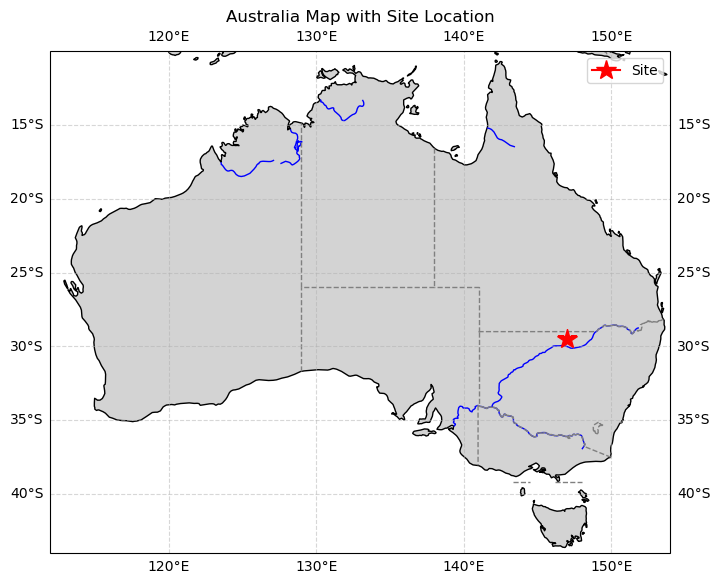

In [69]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Latitude and longitude of the site
site_lat = lat_spi[lat_index]  # Example latitude
site_lon = lon_spi[lon_index]  # Example longitude

# Create a map of Australia
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([112, 154, -44, -10], crs=ccrs.PlateCarree())  # Australia's bounding box

# Add features to the map
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.LAKES, edgecolor='blue', facecolor='none')
ax.add_feature(cfeature.RIVERS, edgecolor='blue')
ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5)

# Add state borders
states = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='10m',
    facecolor='none')
ax.add_feature(states, edgecolor='gray', linestyle='--')

# Plot the site
ax.plot(site_lon, site_lat, marker='*', color='red', markersize=15, label="Site")

# Add a legend
plt.legend(loc="upper right")
plt.title("Australia Map with Site Location")
plt.show()


#### Identify drought-breaking events

In [70]:
precip_series = precip_land[:,lat_index, lon_index]
spi_series    = spi_land[:,lat_index, lon_index]

In [71]:
# condition 1: the rainfall intensity > 5 mm/day
condition1 = precip_series > 5

# condition 2: the day before the rainfall is in drought (<-1)
condition2 = spi_series < -1

# condition 3 : total rainfall of perivous 30 days < 20 mm and no rainfall in the past 30 days > 5 mm/day
condition3 = np.zeros(ntime, dtype=bool)

# Handle the first 30 time points
drought_period                  = 30
daily_rain_thres                = 5
drought_period_tot_rain_thres   = 20

condition3[:drought_period]     = False

# For the remaining time points, check the condition
for t in np.arange(drought_period, ntime):
    if (( np.max(precip_series[t-drought_period:t]) < drought_period) 
     & (np.sum(precip_series[t-drought_period:t]) < drought_period_tot_rain_thres)):
        condition3[t] = True
    else:
        condition3[t] = False

# condition 4 : drought is broken (SPI>-1) 30 days after the rain or 
condition4 = np.zeros(ntime, dtype=bool)

# Handle the last 14 time points separately
recover_period                    = 30
spi_increase_thres                = 1
condition4[:ntime-recover_period] = False

# For the remaining time points, check the condition
for t in range(ntime - recover_period-1):
    if ((np.max(spi_series[t+1:t+1+recover_period]) > -1) 
     | (np.max(spi_series[t+1:t+1+recover_period])-spi_series[t-1] > spi_increase_thres)):
        condition4[t] = True

spi_drought = np.zeros(ntime, dtype=bool)

# For the first 30 time steps, set spi_drought to False
spi_drought[:30] = False

# For the rest of the time steps, evaluate the condition
for t in range(30, ntime):
    if np.max(spi_series[t-30:t]) < -1:
        spi_drought[t] = True
    else:
        spi_drought[t] = False

In [72]:
conditions = (condition1) & (condition2) & (condition3) & (condition4)

In [73]:
print('condition1:', len(conditions[condition1 == True]))
print('condition2:', len(conditions[condition2 == True]))
print('condition3:', len(conditions[condition3 == True]))
print('condition4:', len(conditions[condition4 == True]))
print('conditions:', len(conditions[(condition1 == True)&(condition2 == True)&(condition3 == True)&(condition4 == True)]))

condition1: 501
condition2: 1716
condition3: 4536
condition4: 8143
conditions: 29


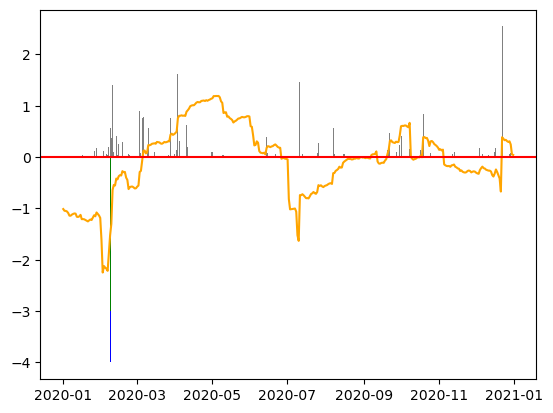

In [77]:
# conditions = np.where(conditions, 1, 0)
breaking_times = time[(condition1 == True)&(condition2 == True)&(condition3 == True)&(condition4 == True)]

date_s = (datetime(2020, 1, 1) - datetime(2000, 1, 1)).days
date_e = (datetime(2021, 1, 1) - datetime(2000, 1, 1)).days

plt.bar(time[date_s:date_e], precip_series[date_s:date_e]/20, color='gray')
plt.bar(time[date_s:date_e], conditions[date_s:date_e]*(-4), color='blue')
plt.bar(time[date_s:date_e], ( (condition1[date_s:date_e] == True)
                              &(condition2[date_s:date_e] == True)
                              &(condition3[date_s:date_e] == True))*(-3), color='green')
plt.plot(time[date_s:date_e], spi_series[date_s:date_e], color='orange')
plt.axhline(y=0,c='red')

In [21]:
spi_before_rain = np.where((precip_series[1:]>5) & (spi_series[:-1]<-1), spi_series[:-1], np.nan) # 

spi_diff        = spi_rainday - spi_before_rain 
x               = np.arange(len(spi_rainday))

NameError: name 'spi_rainday' is not defined

In [15]:
y = np.arange(len(spi_rainday[~np.isnan(spi_rainday)]))

In [16]:
y

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94])

<BarContainer object of 95 artists>

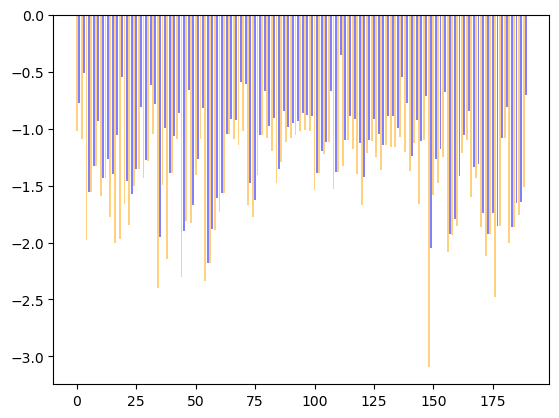

In [17]:
plt.bar(y*2,   spi_before_rain[~np.isnan(spi_rainday)], color='orange', alpha=0.5) # width = 1,
plt.bar(y*2+1, spi_rainday[~np.isnan(spi_rainday)],     color='blue',   alpha=0.5) # width = 1, 

In [ ]:
spi_rainday_all        = np.where((precip[1:,:,:]>0.1) , spi[1:,:,:], np.nan) #& (spi_series[:-1]<-1)
spi_before_rain_all    = np.where((precip[1:,:,:]>0.1) , spi[:-1,:,:], np.nan) # & (spi_series[:-1]<-1)
spi_diff_all           = spi_rainday - spi_before_rain 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Kernel density estimation (KDE) to estimate the PDFs
kde_a = gaussian_kde(~np.isnan(spi_rainday_all.ravel()))
kde_b = gaussian_kde(~np.isnan(spi_before_rain_all.ravel()))
kde_c = gaussian_kde(~np.isnan(spi_diff_all.ravel()))

x = np.arange(-2,2.01, 0.01)
# Evaluate the KDE for each series
pdf_a = kde_a(x)
pdf_b = kde_b(x)
pdf_c = kde_c(x)

# Plot the PDFs
plt.figure(figsize=(8, 6))
# plt.plot(x, pdf_a, label='Time Series A', color='blue')
# plt.plot(x, pdf_b, label='Time Series B', color='orange')
plt.plot(x, pdf_c, label='Time Series C', color='gray')
# plt.fill_between(x, pdf_a, alpha=0.3, color='blue')  # Optional: shaded area under curve
# plt.fill_between(x, pdf_b, alpha=0.3, color='orange')
plt.fill_between(x, pdf_c, alpha=0.3, color='gray')